In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
from cxy_hcp_ffa.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis/s2/1080_fROI/refined_with_Kevin')
work_dir = pjoin(anal_dir, 'plot/tmp')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# 计算ROI面积和激活强度的相关

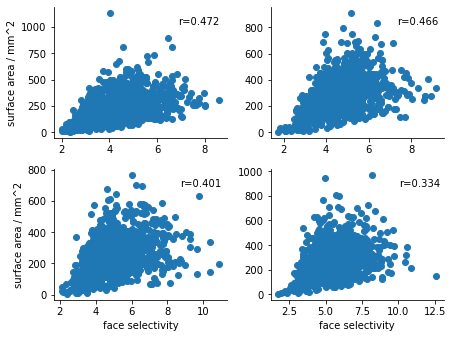

In [13]:
figsize = (6.4, 4.8)
hemis = ('lh', 'rh')
rois = ('mFus-face', 'pFus-face')
activ_file = pjoin(anal_dir, 'tfMRI/individual_activ_{hemi}.pkl')
area_file = pjoin(anal_dir, 'structure/rois_v3_{hemi}_va.pkl')
# out_file = None
out_file = pjoin(work_dir, 'face_selectivity-corr-surface_area.jpg')

_, axes = plt.subplots(len(rois), len(hemis), figsize=figsize)
for hemi_idx, hemi in enumerate(hemis):
    activ_data = pkl.load(open(activ_file.format(hemi=hemi), 'rb'))
    area_data = pkl.load(open(area_file.format(hemi=hemi), 'rb'))
    for roi_idx, roi in enumerate(rois):
        ax = axes[roi_idx, hemi_idx]
        idx1 = activ_data['roi'].index(roi)
        idx2 = area_data['roi'].index(roi)
        activ = activ_data['meas'][idx1]
        area = area_data['meas'][idx2]
        activ = activ[~np.isnan(activ)]
        area = area[~np.isnan(area)]
        r = pearsonr(activ, area)[0]
        ax.scatter(activ, area)
        if roi_idx == 1:
            ax.set_xlabel('face selectivity')
        if hemi_idx == 0:
            ax.set_ylabel('surface area / mm^2')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        text_x = 0.8 * np.max(activ)
        text_y = 0.9 * np.max(area)
        ax.text(text_x, text_y, 'r={:.3f}'.format(r))
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)